In [1]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from coffea import hist, processor 
from coffea.hist import plot
from coffea.util import load

In [2]:
hists = load('hists/STandTT2018.scaled')
#hists = load('hists/STandTT2018.merged')

In [ ]:
hists['recoil'].identifiers('dataset')

In [ ]:
dset = 'TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8____0_'
r = 'tecr'
print(dset)
print(hists['recoil'].integrate('dataset',dset).integrate('region',r).values(overflow='all'))
print(hists['sumw'].integrate('dataset',dset).values(overflow='all'))
print()

dset = 'TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8____1_'
print(dset)
print(hists['recoil'].integrate('dataset',dset).integrate('region',r).values(overflow='all'))
print(hists['sumw'].integrate('dataset',dset).values(overflow='all'))

In [ ]:
hists = load('pods/scaled_condor_hists_darkhiggs2018.coffea')

In [ ]:
hists['sumw'].integrate('process','TT').values(overflow='all')

In [3]:
process = hist.Cat("process", "Process", sorting='placement')
cats = ("process",)

signal_hists = {}
bkg_hists = {}
data_hists = {}

bkg_map = OrderedDict()
bkg_map["Hbb"] = ("Hbb*")
bkg_map["DY"] = ("DY*",)
bkg_map["Diboson"] = ("Diboson*",)
bkg_map["STmerged"] = ("STmerged*",)
bkg_map["STunmerged"] = ("STunmerged*",)
bkg_map["TTmerged"] = ("TTmerged*",)
bkg_map["TTunmerged"] = ("TTunmerged*",)
bkg_map["Wjets"] = ("Wjets*",)
bkg_map["ZJets"] = ("ZJets*",)                                                                                                                                                
bkg_map["Gjets"] = ("Gjets*",)

signal_map = OrderedDict()
signal_map["Mhs_50"] = ("Mhs_50*",)  ## signals                                                                                                                                                               
signal_map["Mhs_70"] = ("Mhs_70*",)
signal_map["Mhs_90"] = ("Mhs_90*",)
signal_map["MonoJet"] = ("MonoJet*",)  ## signals                                                                                                                                                              
signal_map["MonoW"] = ("MonoW*",)    ## signals                                                                                                                                                                
signal_map["MonoZ"] = ("MonoZ*",)    ## signals    

data_map = OrderedDict()
data_map["MET"] = ("MET*", )
data_map["SingleElectron"] = ("SingleElectron*", )
data_map["SinglePhoton"] = ("SinglePhoton*", )


for key in hists.keys():                                                                                                                            
    bkg_hists[key] = hists[key].group(cats, process, bkg_map)  
    signal_hists[key] = hists[key].group(cats, process, signal_map)
    data_hists[key] = hists[key].group(cats, process, data_map)

In [23]:
exp = 0
region = 'sr'
data={}
data['sr'] = 'MET'
data['wmcr'] = 'MET'
data['tmcr'] = 'MET'
data['wecr'] = 'SingleElectron'
data['tecr'] = 'SingleElectron'
data['zmcr'] = 'MET'
data['zecr'] = 'SingleElectron'
data['gcr'] = 'SinglePhoton'

variable = 'recoil'
cut_bin = 0
cut_value_array = bkg_hists[variable].integrate('region','sr').integrate('process', 'Mhs_50').axis(variable).edges(overflow='all')

print('------------------------')
print('------------------------')
print('Category:', region)
#print('------------------------')
if cut_bin!=0: print(variable,'> %.2f' % cut_value_array[()][cut_bin])
print('------------------------')
print('------------------------')
for p in bkg_hists[variable].identifiers('process'):
    yld_array = bkg_hists[variable].integrate('region',region).integrate('process', p).values(overflow='all')
    if () in yld_array:
        yld = np.cumsum(yld_array[()])[16] - np.cumsum(yld_array[()])[cut_bin]
        exp += yld
        print(p, '%.1f' % yld)

print('------------------------')
print('Total expected:', '%.1f' % exp)
print('------------------------')

for p in signal_hists[variable].identifiers('process'):
    yld_array = signal_hists[variable].integrate('region',region).integrate('process', p).values(overflow='all')
    if () in yld_array:
        yld = np.cumsum(yld_array[()])[16] - np.cumsum(yld_array[()])[cut_bin]
        print(p, '%.1f' % yld)
        print(p,'S/B %.3f' % (yld/exp))
        print(p,'S/sqrt(B) %.1f' % (yld/np.sqrt(exp)))
        #print(p,'Fraction %.2f' % (yld/np.cumsum(yld_array[()])[16]))
        print('------------------------')

yld_array = data_hists[variable].integrate('region',region).integrate('process', data[region]).values(overflow='all')
if () in yld_array and 'iszeroL' not in region:
    yld = np.cumsum(yld_array[()])[16] - np.cumsum(yld_array[()])[cut_bin]
    print('Total observed:', '%.1f' % yld)   
print('------------------------')
print()

------------------------
------------------------
Category: sr
------------------------
------------------------
STmerged 1084.9
STunmerged 0.5
TTmerged 3477.5
TTunmerged 2043.0
------------------------
Total expected: 6605.9
------------------------
------------------------



sr
tecr
tmcr
wecr
wmcr
zecr
zmcr


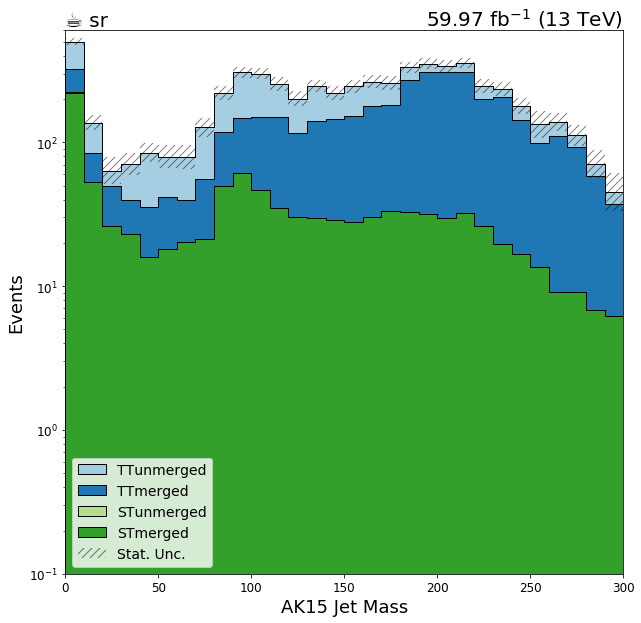

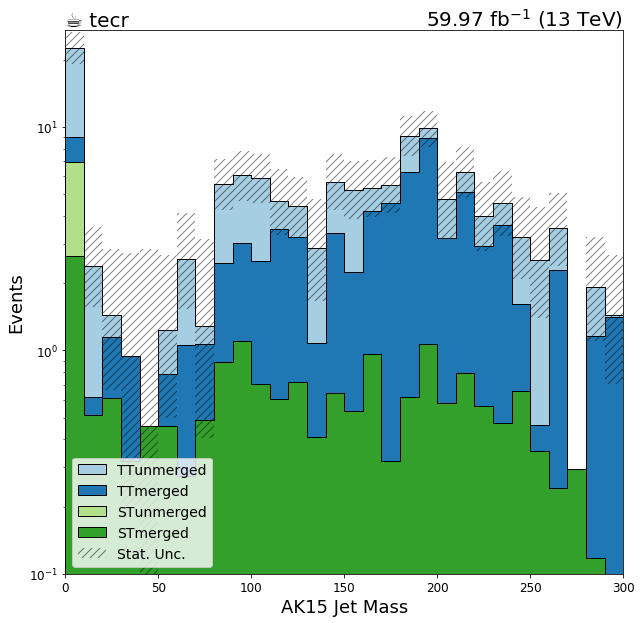

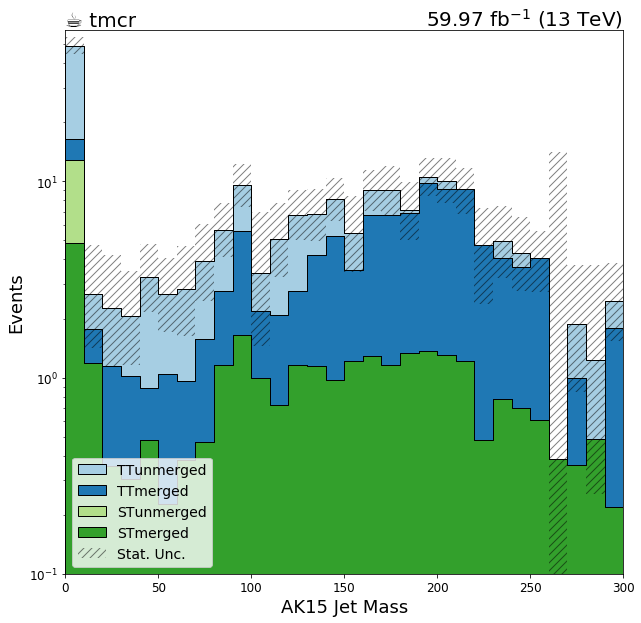

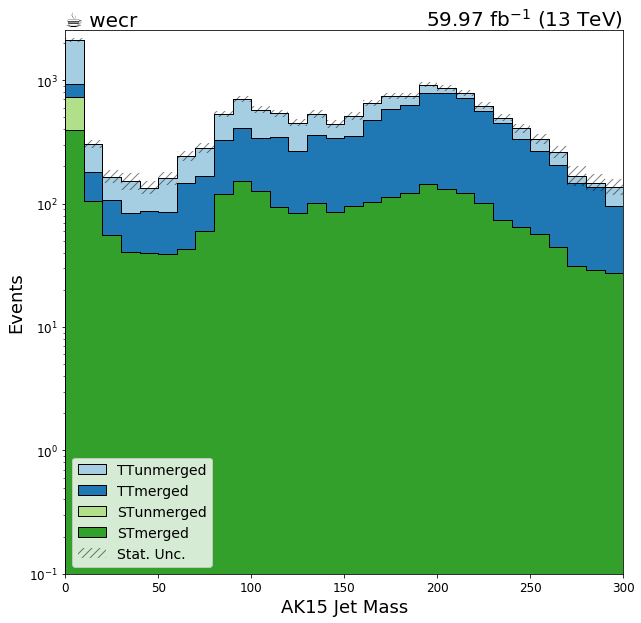

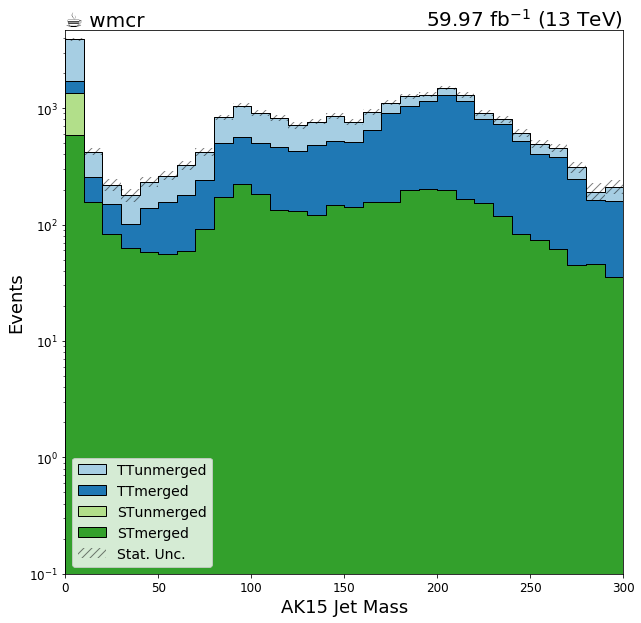

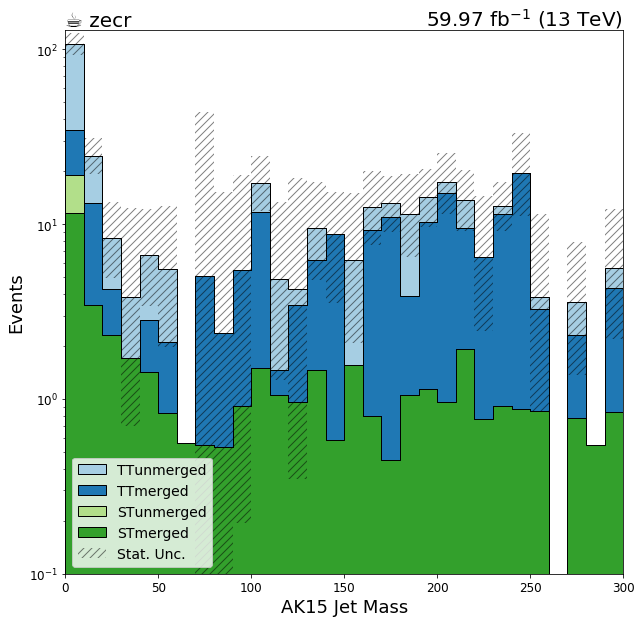

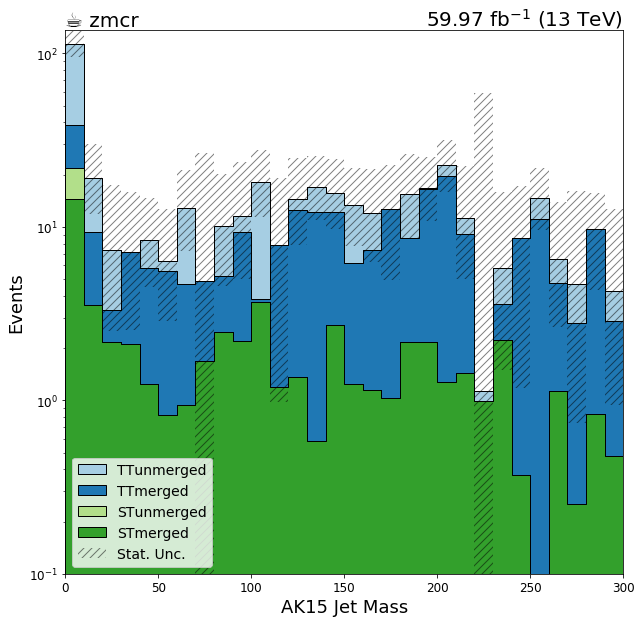

In [5]:
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
from cycler import cycler


if not os.path.exists('stack'):
    os.makedirs('stack')

for key in bkg_hists.keys():
    #if key=='sumw' or key == 'recoilVSmindphi': continue
    if not key == 'fjmass': continue
    
    for j in bkg_hists[key].identifiers('region'):
        if 'mass' in str(j): continue
        if 'mono' in str(j): continue
        print(j)
        
        plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
        fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
        error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
        nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
        data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
        #colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
        colors = ['#a6cee3', '#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']

        fig, ax = plt.subplots(1, 1, figsize=(10,10))
        ax.set_prop_cycle(cycler(color=colors))

        plot.plot1d(bkg_hists[key].integrate('region',j),
                overlay="process",
                ax=ax,
                clear=False,
                stack=True,
                #line_opts={'linestyle':'none', 'label':'_', 'alpha': 0.},
                #line_opts={'linestyle':'-','color':'k','label':'_'},
                fill_opts=fill_opts,
                error_opts=error_opts
                   )
        
        ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
        args = {'linestyle':'--', 'linewidth': 5}
        ax.autoscale(axis='x', tight=True)
        ax.set_yscale('log')
        ax.set_ylim(.1, None)
        leg = ax.legend(loc='lower left')
        
        coffee = plt.text(0., 1., u"☕ "+str(j).split('_')[0], fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
        lumi = plt.text(1., 1., r"59.97 fb$^{-1}$ (13 TeV)", fontsize=20, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)

In [ ]:
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
from cycler import cycler


if not os.path.exists('stack'):
    os.makedirs('stack')
    
region = 'isoneM'
R = {}
R['sr'] = 'Signal Region'
R['wmcr'] = 'Single Muon WCR'
R['tmcr'] = 'Single Muon TopCR'
R['wecr'] = 'Single Electron WCR'
R['tecr'] = 'Single Electron TopCR'
R['zecr'] = 'Double Electron CR'
R['zmcr'] = 'Double Muon CR'
R['gcr'] = 'Single Photon CR'

for key in bkg_hists.keys():
    #if key=='sumw' or key == 'recoilVSmindphi': continue
    #if 'prob' in str(key): continue
    #if not key == 'recoil': continue
    if not key == 'fjmass': continue
    
    for j in bkg_hists[key].identifiers('region'):
        
        if str(j) != 'tecr': continue
            
        plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
        fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
        error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
        nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
        data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
        #colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
        colors = ['#a6cee3', '#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']


        fig, (ax, rax) = plt.subplots(2, 1, figsize=(11,13), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
        fig.subplots_adjust(hspace=.07)
        ax.set_prop_cycle(cycler(color=colors))
        

        plot.plot1d(data_hists[key].integrate('jet_selection',j).integrate('region',region)[data[region]],            
                overlay="process",
                ax=ax,
                clear=False,
                error_opts=data_err_opts
                   )

        plot.plot1d(bkg_hists[key].integrate('jet_selection',j).integrate('region',region),
                overlay="process",
                ax=ax,
                clear=False,
                stack=True,
                #line_opts={'linestyle':'none', 'label':'_', 'alpha': 0.},
                #line_opts={'linestyle':'-','color':'k','label':'_'},
                fill_opts=fill_opts,
                error_opts=error_opts
                   )
        
        plot.plotratio(data_hists[key].integrate('jet_selection',j).integrate('region',region).integrate('process',data[region]), 
                   bkg_hists[key].integrate('jet_selection',j).integrate('region',region).sum('process'),
                   ax=rax,
                   overflow='over',
                   error_opts=data_err_opts,
                   denom_fill_opts={},
                   guide_opts={},
                   unc='num'
                   )
        
        rax.set_ylabel('Ratio (data/MC)')
        rax.set_ylim(0.0,2.0)
        rax.grid(axis='y')
        
        ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
        args = {'linestyle':'--', 'linewidth': 5}
        ax.autoscale(axis='x', tight=True)
        ax.set_yscale('log')
        if(key=='dielemass' or key=='dimumass'): ax.set_xlim(50, 130)
        ax.set_ylim(.1, None)
        leg = ax.legend(ncol=2)
        
        coffee = plt.text(0., 1., u"☕ "+R[region]+" "+str(j).split('_')[0], fontsize=19, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
        lumi = plt.text(1., 1., r"59.97 fb$^{-1}$ (13 TeV)", fontsize=17, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
        plot_path = os.path.abspath('stack') 
        plot_name = 'stack_'+key+'_'+region+'_'+deep+'_'+str(j)+'.png'
        fig.savefig(os.path.join(plot_path, plot_name))

sr
tecr
tmcr
wecr
wmcr
zecr
zmcr


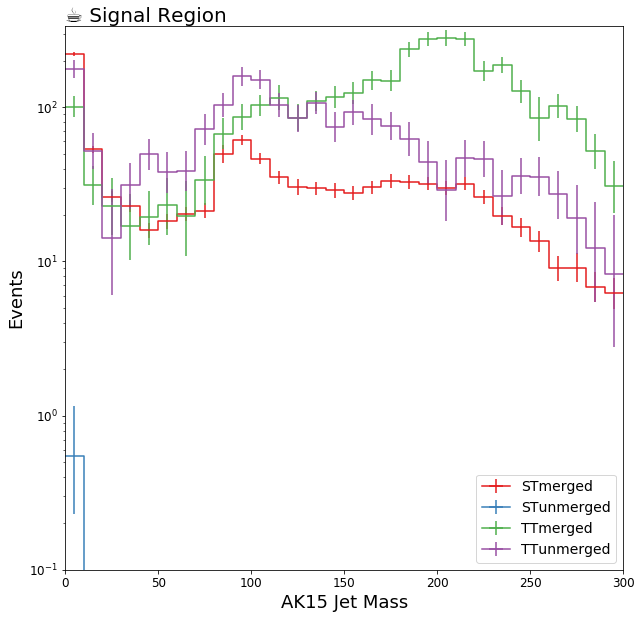

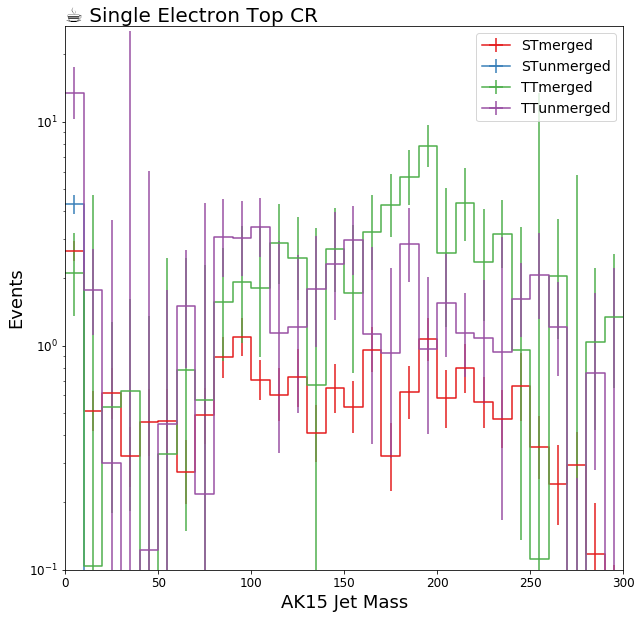

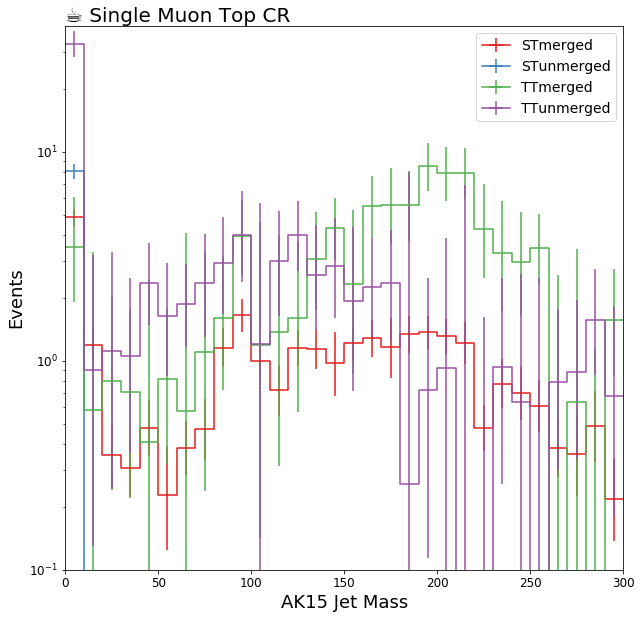

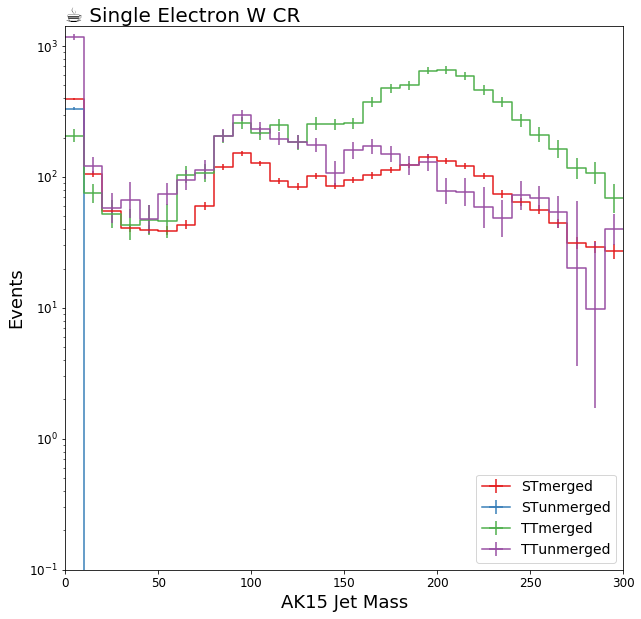

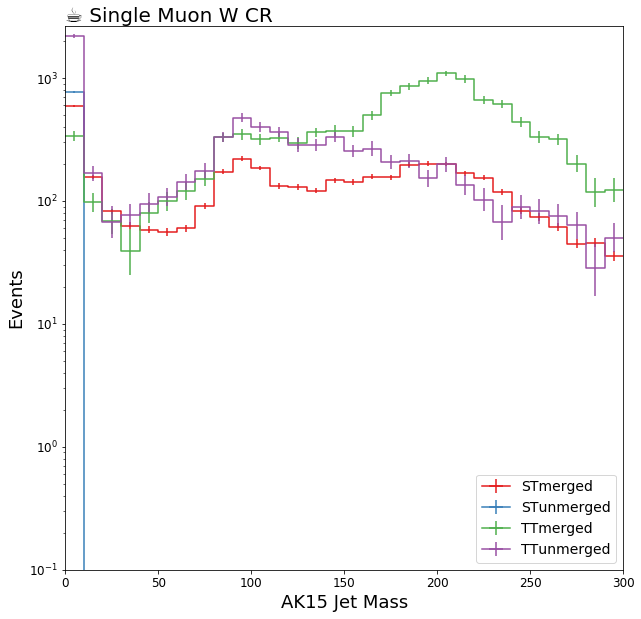

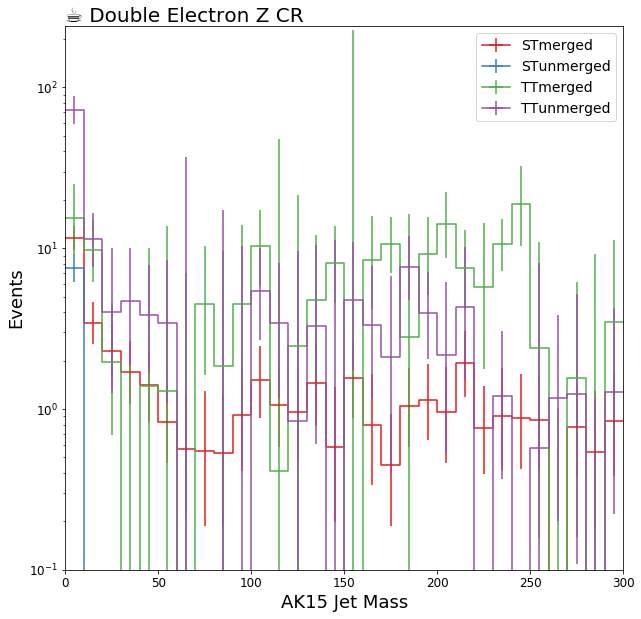

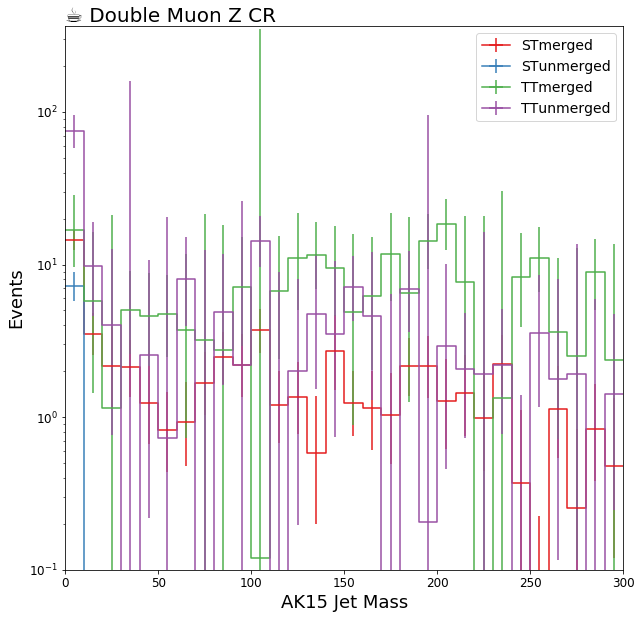

In [16]:
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
from cycler import cycler

if not os.path.exists('unstack'):
    os.makedirs('unstack')

R = {}
R['sr'] = 'Signal Region'
R['wmcr'] = 'Single Muon W CR'
R['tmcr'] = 'Single Muon Top CR'
R['wecr'] = 'Single Electron W CR'
R['tecr'] = 'Single Electron Top CR'
R['zecr'] = 'Double Electron Z CR'
R['zmcr'] = 'Double Muon Z CR'
R['gcr'] = 'Single Photno CR'

    
for key in bkg_hists.keys():
    #if key=='sumw' or key == 'recoilVSmindphi': continue
    if not key == 'fjmass': continue
    
    for j in bkg_hists[key].identifiers('region'):
        if 'mass' in str(j): continue
        if 'mono' in str(j): continue
        print(j)
        
        plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
        fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
        error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
        nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
        data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
        colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']
        #colors = ['#a6cee3', '#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']

        fig, ax = plt.subplots(1, 1, figsize=(10,10))
        ax.set_prop_cycle(cycler(color=colors))

        plot.plot1d(bkg_hists[key].integrate('region',j),
                overlay="process",
                ax=ax,
                clear=False,
                stack=False,
                #line_opts={'linestyle':'none', 'label':'_', 'alpha': 0.},
                #line_opts={'linestyle':'-','color':'k','label':'_'},
                #error_opts=error_opts
                   )
        
        ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
        args = {'linestyle':'--', 'linewidth': 5}
        ax.autoscale(axis='x', tight=True)
        ax.set_yscale('log')
        ax.set_ylim(.1, None)
        leg = ax.legend(loc='best')
        
        coffee = plt.text(0., 1., u"☕ "+R[str(j)], fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
        plot_path = os.path.abspath('unstack')
        plot_name = 'unstack'+key+'_'+R[str(j)]+'.png'
        fig.savefig(os.path.join(plot_path, plot_name))